# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [34]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [35]:
### TODO 1

def load_data(data_path):
    data = np.loadtxt(data_path , delimiter=",")
    return data

In [36]:
### TODO 2.1

def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(len(data), K, replace=False)
        centers = data[indices]
    else:
        centers = init_centers

    return centers

In [37]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    N = len(data)
    labels = np.ones(N)
    return labels


In [38]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size Nx2
def calculate_distances(data, centers):
    N = len(data)
    K = len(centers)
    distances = np.zeros((N, K))

    for i in range(N):
        for j in range(K):
            distances[i][j] = np.linalg.norm(data[i] - centers[j])

    return distances

In [39]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    return labels

In [40]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.zeros((K, 2))

    for k in range(K):
        cluster_points = data[labels == k]
        if len(cluster_points) == 0 :
            continue
        centers[k] = np.mean(cluster_points, axis=0)

    return centers

In [41]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [42]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [43]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')

    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.savefig('kmeans.png')
    return plt

Time taken for the algorithm to converge: 0.006363868713378906


<module 'matplotlib.pyplot' from 'c:\\Users\\preri\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\site-packages\\matplotlib\\pyplot.py'>

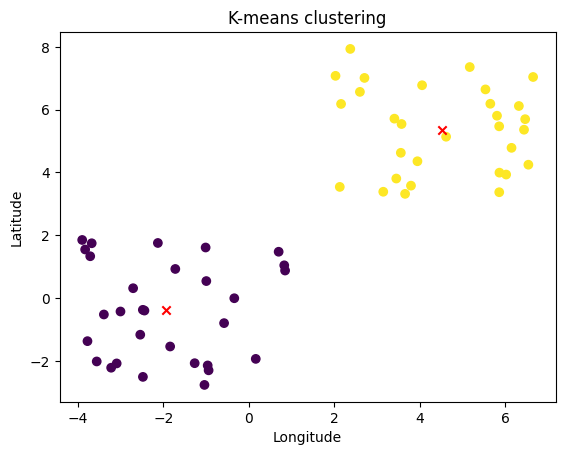

In [44]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)